In [48]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [50]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [51]:
df1 = pd.read_csv('winequality-red.csv', sep=';')
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [52]:
df1['tipo'] = 1

In [53]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [54]:
df2 = pd.read_csv('winequality-white.csv', sep=';')
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [55]:
df2['tipo'] = 0

In [56]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  tipo                  1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  tipo                  4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [59]:
df = pd.concat([df1, df2], ignore_index=True)

In [60]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  tipo                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [62]:
df['wine_quality'] = 0
df.loc[df["quality"] > 6, "wine_quality"] = 1

In [63]:
df.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo,wine_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1,0


In [64]:
df = df.drop_duplicates()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  tipo                  5320 non-null   int64  
 13  wine_quality          5320 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 623.4 KB


In [66]:
df.quality.value_counts()

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

In [67]:
target = df.groupby('wine_quality').count()
target

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
wine_quality,,,,,,,,,,,,,
0,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311
1,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009


In [68]:
4311/1009

4.272547076313181

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_padr = pd.DataFrame(scaler.fit_transform(df), index = df.index, columns=df.columns)

In [70]:
df_padr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo,wine_quality
0,0.140064,2.115349,-2.164515,-0.699699,0.523880,-1.069272,-1.411143,1.100996,1.779304,0.177941,-0.969152,-0.904497,1.707233,-0.48379
1,0.443199,3.185297,-2.164515,-0.544135,1.120736,-0.282905,-0.829839,0.763753,-0.153797,0.979389,-0.631833,-0.904497,1.707233,-0.48379
2,0.443199,2.471998,-1.892672,-0.610806,0.957957,-0.844596,-1.058837,0.831202,0.220351,0.779027,-0.631833,-0.904497,1.707233,-0.48379
3,3.019841,-0.381197,1.641293,-0.699699,0.496751,-0.732258,-0.953146,1.168444,-0.403229,0.311515,-0.631833,0.232268,1.707233,-0.48379
5,0.140064,1.877583,-2.164515,-0.721923,0.496751,-0.956934,-1.305451,1.100996,1.779304,0.177941,-0.969152,-0.904497,1.707233,-0.48379


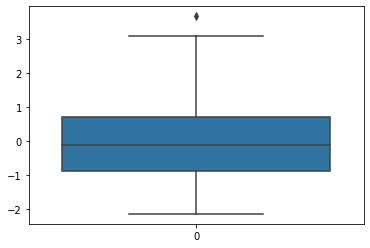

In [71]:
ax = sns.boxplot(data = df_padr['alcohol'])

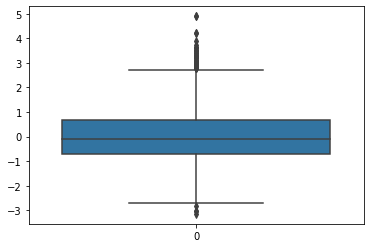

In [72]:
ax = sns.boxplot(data = df_padr['pH'])

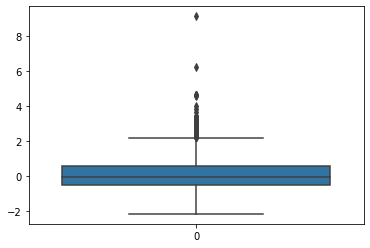

In [73]:
ax = sns.boxplot(data = df_padr['citric acid'])

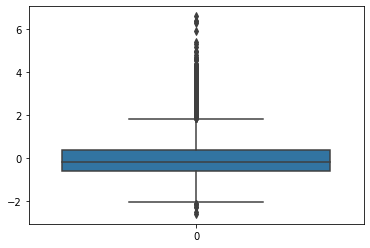

In [74]:
ax = sns.boxplot(data = df_padr['fixed acidity'])

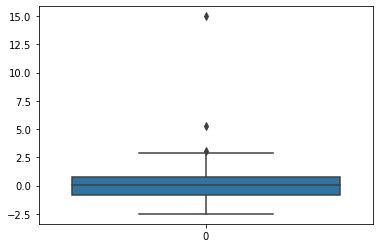

In [75]:
ax = sns.boxplot(data = df_padr['density'])

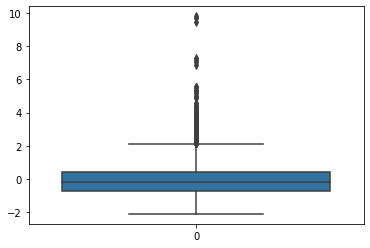

In [76]:
ax = sns.boxplot(data = df_padr['sulphates'])

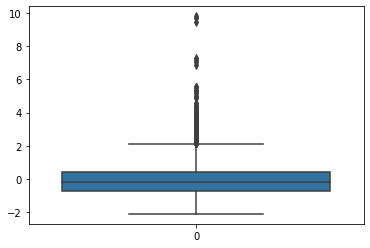

In [77]:
ax = sns.boxplot(data = df_padr['sulphates'])

In [78]:
grupos = df_padr.groupby('wine_quality')

-0.483790         AxesSubplot(0.1,0.15;0.363636x0.75)
 2.067014    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

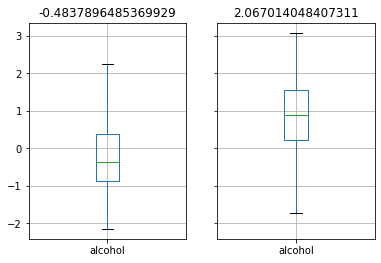

In [79]:
grupos.boxplot(column='alcohol', showfliers=False)

-0.483790         AxesSubplot(0.1,0.15;0.363636x0.75)
 2.067014    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

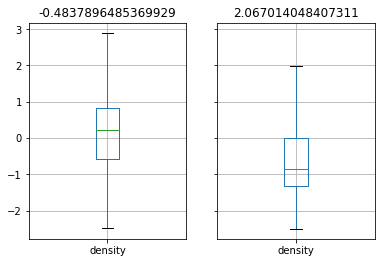

In [80]:
grupos.boxplot(column='density', showfliers=False)

-0.483790         AxesSubplot(0.1,0.15;0.363636x0.75)
 2.067014    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

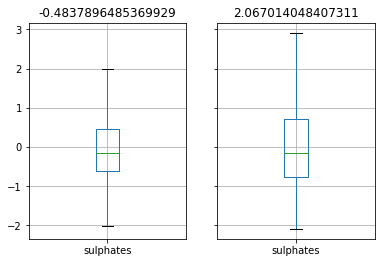

In [81]:
grupos.boxplot(column='sulphates', showfliers=False)

In [82]:
df_padr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   float64
 12  tipo                  5320 non-null   float64
 13  wine_quality          5320 non-null   float64
dtypes: float64(14)
memory usage: 752.5 KB


In [83]:
df.isna().count()

fixed acidity           5320
volatile acidity        5320
citric acid             5320
residual sugar          5320
chlorides               5320
free sulfur dioxide     5320
total sulfur dioxide    5320
density                 5320
pH                      5320
sulphates               5320
alcohol                 5320
quality                 5320
tipo                    5320
wine_quality            5320
dtype: int64

In [84]:
df = df.drop(columns = ['quality'], axis = 1)

In [85]:
X = df.drop(columns = ['wine_quality'], axis = 1)

y = df[['wine_quality']]

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.wine_quality)
y.wine_quality = le.transform(y.wine_quality)

C:\Users\desktopdell\AppData\Local\Temp\ipykernel_8156\3967782387.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.wine_quality = le.transform(y.wine_quality)


In [87]:
X = pd.get_dummies(X)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X))

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

In [90]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(random_state=0)
lr = model.fit(X_train, y_train)

C:\Users\desktopdell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
X_test.assign(df = y_test).assign(label= lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,11,df,label
1185,0.064281,1.461492,-0.397533,-0.677476,0.632399,-0.732258,-0.178073,0.440001,0.345068,-0.089209,-0.547503,1.707233,0.0,0
42,0.367415,3.512226,0.757802,-0.633029,1.554812,-0.451412,-0.001920,0.831202,0.157993,1.313326,-1.137811,1.707233,NaN,0
3950,-0.238854,-0.916171,0.010232,0.633706,-0.398533,-0.002059,0.279924,0.008330,1.093365,-0.957445,-0.041525,-0.585743,NaN,0
4247,-0.011503,-0.202872,0.214115,0.478142,-0.290013,0.840478,1.125458,0.325338,-0.527946,-0.022421,-0.716163,-0.585743,0.0,0
5203,-1.527175,-0.262314,0.146154,-0.788593,-0.507052,-0.676088,-0.318996,-1.725096,2.091094,-0.356358,2.066718,-0.585743,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,0.367415,1.164284,-0.397533,-0.699699,0.876568,-0.395243,0.579384,0.615367,0.220351,0.378303,-0.716163,1.707233,NaN,0
2266,0.367415,-0.024548,-0.125689,0.655929,-0.235754,-0.282905,1.372072,0.190441,-1.588033,-0.423146,0.295794,-0.585743,NaN,0
3048,-0.693555,-0.797288,-0.261611,-0.788593,-0.154364,0.896647,0.491307,-0.585216,0.033277,-0.757083,-0.378844,-0.585743,NaN,0
3810,-0.466204,-0.678405,-0.805298,1.411526,-0.344273,0.840478,0.297539,0.507449,-1.650391,-0.155996,-0.716163,-0.585743,NaN,0


In [93]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8310955961331902
Acurácia (Teste): 0.8226817042606517
Acurácia Balanceada (Treino): 0.6271803017225819
Acurácia Balanceada (Teste): 0.5987261635464753
Precision (Treino): 0.6133720930232558
Precision (Teste): 0.576
Recall (Treino): 0.2984441301272984
Recall (Teste): 0.23841059602649006
F1-Score (Treino): 0.401522359657469
F1-Score (Teste): 0.3372365339578454
ROCAUC (Treino): 0.8356531282656178
ROCAUC (Teste): 0.8142087269824049


In [94]:
# Balanceando o dataset

In [95]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

In [96]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [97]:
ros = RandomOverSampler(sampling_strategy=.7, random_state=0)

In [98]:
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [99]:
model = LogisticRegressionCV(random_state=0)
lr = model.fit(X_train_resampled, y_train_resampled)

C:\Users\desktopdell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.7870569280343717
Acurácia (Teste): 0.7869674185463659
Acurácia Balanceada (Treino): 0.7494511300649456
Acurácia Balanceada (Teste): 0.7290090790914767
Precision (Treino): 0.45943396226415095
Precision (Teste): 0.4549763033175355
Recall (Treino): 0.6888260254596889
Recall (Teste): 0.6357615894039735
F1-Score (Treino): 0.5512167515563101
F1-Score (Teste): 0.5303867403314917
ROCAUC (Treino): 0.8362288380928627
ROCAUC (Teste): 0.8165757392755151


In [101]:
#Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf = RandomForestClassifier(random_state=0)

In [104]:
rf.fit(X_train_resampled, y_train_resampled)

C:\Users\desktopdell\AppData\Local\Temp\ipykernel_8156\864256435.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=0)

In [105]:
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 1.0
Acurácia (Teste): 0.8414786967418546
Acurácia Balanceada (Treino): 1.0
Acurácia Balanceada (Teste): 0.6953565616139697
Precision (Treino): 1.0
Precision (Teste): 0.6069868995633187
Recall (Treino): 1.0
Recall (Teste): 0.4602649006622517
F1-Score (Treino): 1.0
F1-Score (Teste): 0.5235404896421846
ROCAUC (Treino): 1.0
ROCAUC (Teste): 0.8386887519575832


In [107]:
from sklearn.svm import SVC

In [108]:
clf = SVC(random_state=0)

In [109]:
clf.fit(X_train_resampled, y_train_resampled)

C:\Users\desktopdell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [110]:
clf.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [111]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, clf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, clf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, clf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, clf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, clf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, clf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, clf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, clf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, clf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, clf.predict(X_test))}")


Acurácia (Treino): 0.8141783029001074
Acurácia (Teste): 0.793233082706767
Acurácia Balanceada (Treino): 0.8095084947672759
Acurácia Balanceada (Teste): 0.7607961349887918
Precision (Treino): 0.5067024128686327
Precision (Teste): 0.4692982456140351
Recall (Treino): 0.801980198019802
Recall (Teste): 0.7086092715231788
F1-Score (Treino): 0.6210295728368018
F1-Score (Teste): 0.5646437994722955


In [112]:
from sklearn.ensemble import GradientBoostingClassifier

In [113]:
gbc = GradientBoostingClassifier(random_state=0)

In [114]:
gbc.fit(X_train_resampled, y_train_resampled)

C:\Users\desktopdell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=0)

In [115]:
gbc.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)